## Plotting SPARTACUS data

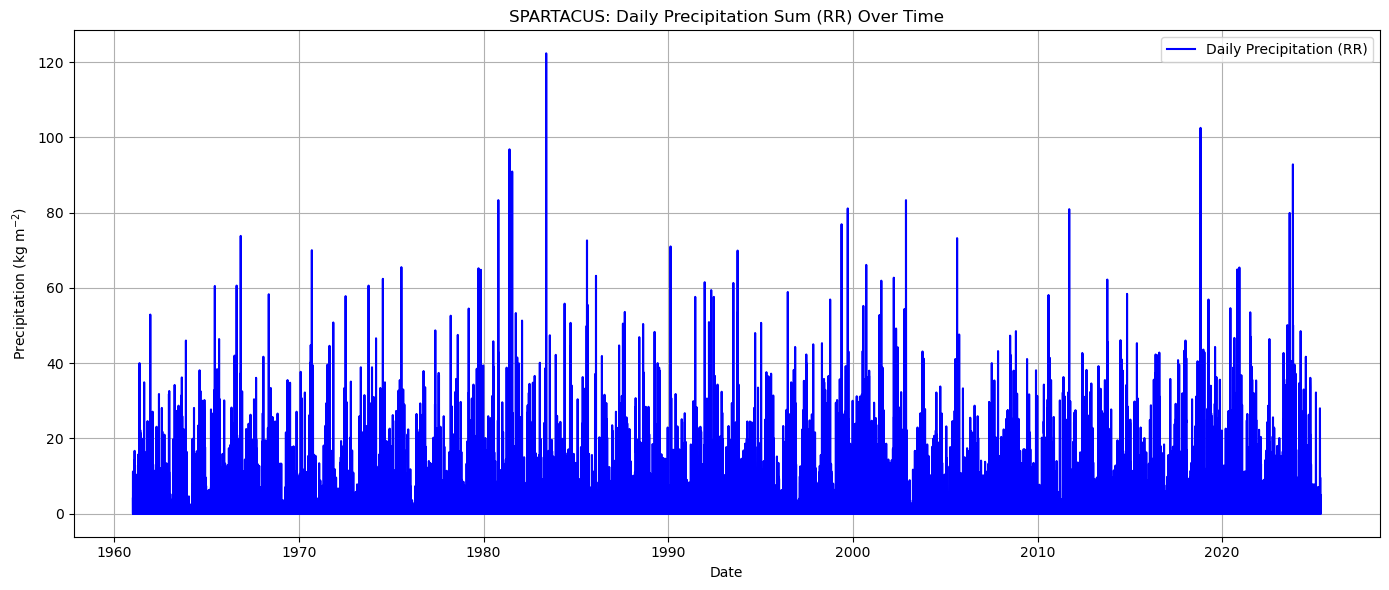

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df_spartacus = pd.read_csv("SPARTACUS_data/SPARTACUS - Spatial Dataset for Climate in Austria Datensatz_19610101_20250430.csv")

# Convert time column to datetime
# Convert the 'time' column to datetime, coercing errors to NaT
df_spartacus['time'] = pd.to_datetime(df_spartacus['time'], errors='coerce')

# Remove timezone if present
df_spartacus['time'] = df_spartacus['time'].dt.tz_localize(None)


# Optional: aggregate if you have multiple grid points (mean across locations)
#df_grouped = df.groupby('time')['RR [kg m-2]'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_spartacus['time'], df_spartacus['RR [kg m-2]'], label='Daily Precipitation (RR)', color='blue')
plt.xlabel("Date")
plt.ylabel("Precipitation (kg m$^{-2}$)")
plt.title("SPARTACUS: Daily Precipitation Sum (RR) Over Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

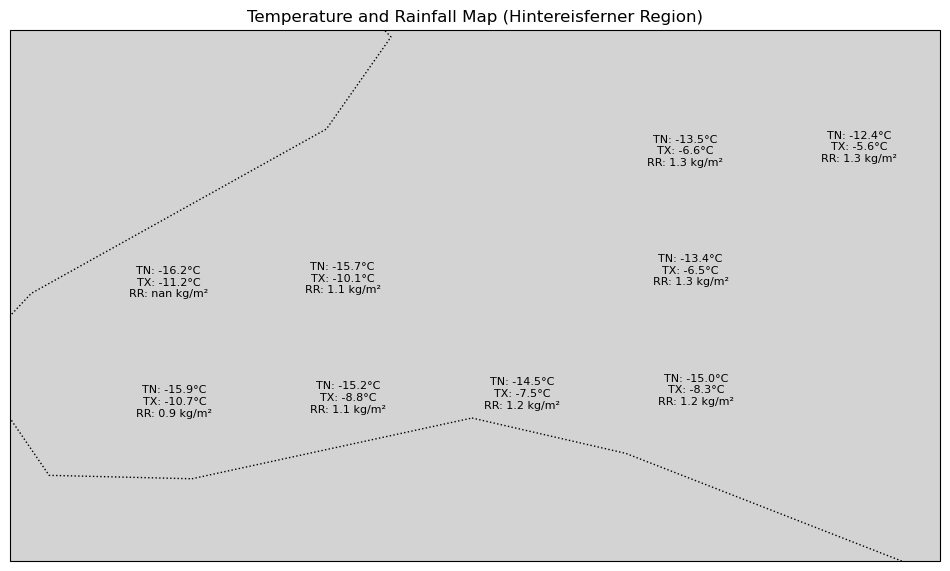

,time,RR [kg m-2],TN [degree_Celsius],TX [degree_Celsius],SA [s],lat,lon
0,1980-02-01T00:00+00:00,1.3,-12.4,-5.6,1080.0,46.809950,10.783888
1,1980-02-01T00:00+00:00,1.3,-13.5,-6.6,1440.0,46.809654,10.770790
2,1980-02-01T00:00+00:00,1.3,-13.4,-6.5,720.0,46.800663,10.771222
3,1980-02-01T00:00+00:00,1.2,-15.0,-8.3,2160.0,46.791668,10.771654
4,1980-02-01T00:00+00:00,1.2,-14.5,-7.5,1440.0,46.791374,10.758560


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the CSV file into a DataFrame
df = pd.read_csv('SPARTACUS_data/SPARTACUS - Spatial Dataset for Climate in Austria Datensatz_19800201_19800201.csv')


# Create a map with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Temperature and Rainfall Map (Hintereisferner Region)')
ax.set_extent([10.72, 10.79, 46.78, 46.82], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Plot data points
for _, row in df.iterrows():
        ax.text(row['lon'], row['lat'], f'TN: {row["TN [degree_Celsius]"]}°C\nTX: {row["TX [degree_Celsius]"]}°C\nRR: {row["RR [kg m-2]"]} kg/m²',
            fontsize=8, ha='center', va='bottom')

# Show the map
plt.show()


df.head()

There is obviously some difference! The DEMs are hard to see

## I should download monthly data not accumulate daily data!!


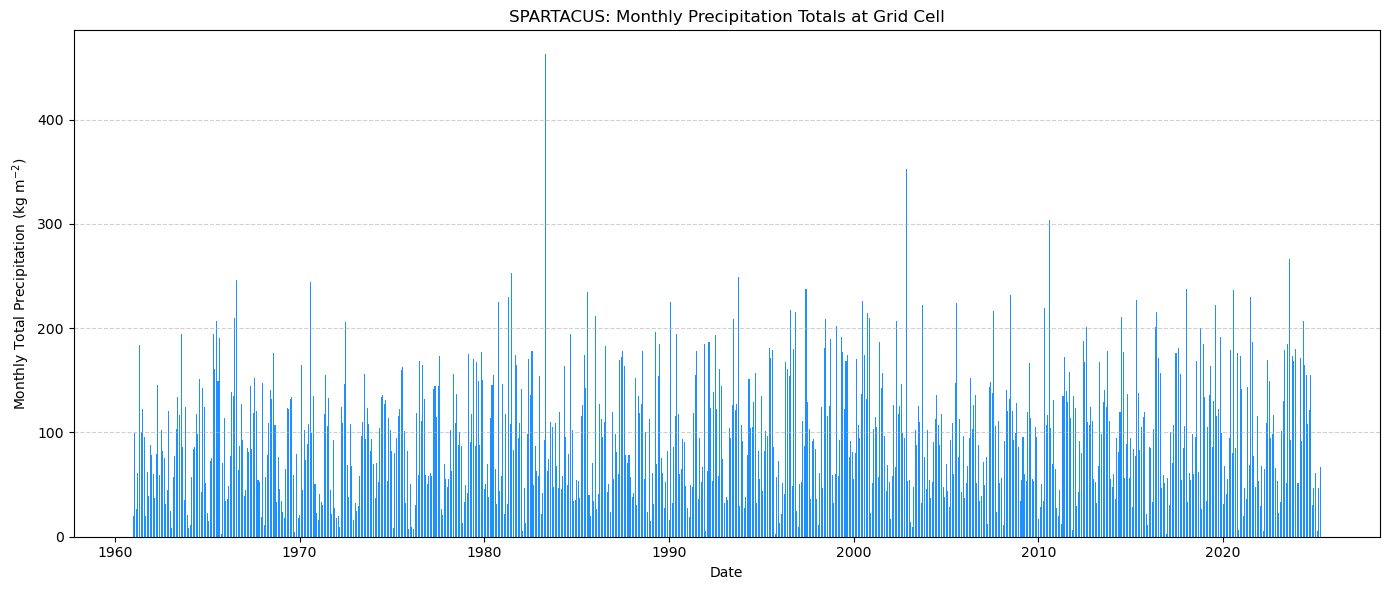

In [18]:

df = pd.read_csv('SPARTACUS_data/SPARTACUS - Spatial Dataset for Climate in Austria Datensatz_19610101_20250430.csv')
# Convert time column to datetime
# Convert the 'time' column to datetime, coercing errors to NaT
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Remove timezone if present
df['time'] = df['time'].dt.tz_localize(None)


# Resample to monthly frequency and sum daily precipitation



df_monthly_spartacus = df.resample('MS', on='time')['RR [kg m-2]'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df_monthly_spartacus['time'], df_monthly_spartacus['RR [kg m-2]'], width=20, color='dodgerblue')
plt.xlabel("Date")
plt.ylabel("Monthly Total Precipitation (kg m$^{-2}$)")
plt.title("SPARTACUS: Monthly Precipitation Totals at Grid Cell")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
print(monthly_rr)

                         time  RR [kg m-2]
0   1961-01-31 00:00:00+00:00         20.2
1   1961-02-28 00:00:00+00:00         99.2
2   1961-03-31 00:00:00+00:00         26.9
3   1961-04-30 00:00:00+00:00         61.5
4   1961-05-31 00:00:00+00:00        183.7
..                        ...          ...
767 2024-12-31 00:00:00+00:00         46.8
768 2025-01-31 00:00:00+00:00         60.9
769 2025-02-28 00:00:00+00:00          5.3
770 2025-03-31 00:00:00+00:00         46.5
771 2025-04-30 00:00:00+00:00         66.9

[772 rows x 2 columns]


## Compare to ERA5 data for sanity check

        time  RR_spartacus
0 1961-01-01          20.2
1 1961-02-01          99.2
2 1961-03-01          26.9
3 1961-04-01          61.5
4 1961-05-01         183.7
        time     RR_era5
0 1940-01-01   20.965576
1 1940-02-01   43.271782
2 1940-03-01   41.060448
3 1940-04-01   70.344208
4 1940-05-01  111.400368
(768, 3)


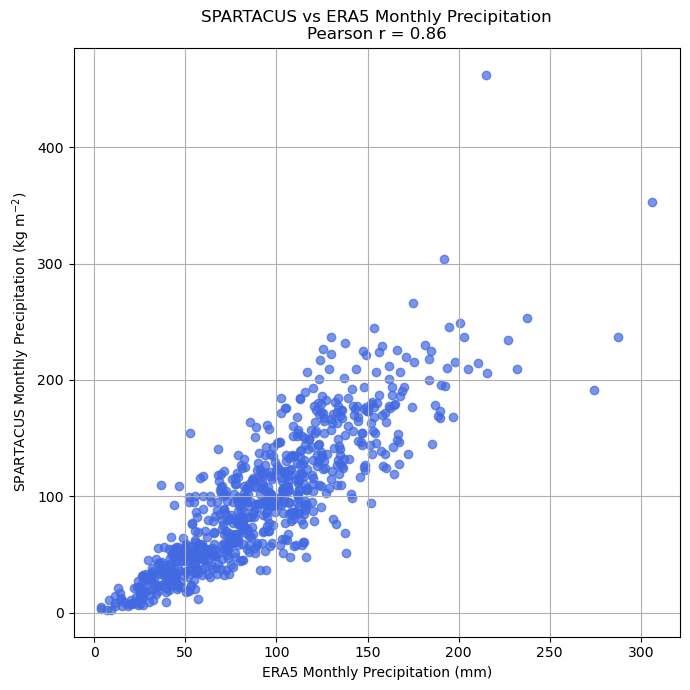

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#df_monthly_spartacus


# --- Load ERA5 data ---
df_era5 = pd.read_pickle("era5_data/era5_monthlytotal_precipitation_1940-01-01_to_2100-12-31_lat_46.79_lng_10.74.pkl")
df_era5['Date'] = pd.to_datetime(df_era5['Date'])
df_era5_monthly = df_era5[['Date', 'precipitation_mm']].copy()
df_monthly_spartacus.rename(columns={'Date': 'time', 'RR [kg m-2]': 'RR_spartacus'}, inplace=True)

df_era5_monthly.rename(columns={'Date': 'time', 'precipitation_mm': 'RR_era5'}, inplace=True)


# Remove timezone from the 'time' column in both DataFrames
df_monthly_spartacus['time'] = df_monthly_spartacus['time'].dt.tz_localize(None)
df_era5_monthly['time'] = df_era5_monthly['time'].dt.tz_localize(None)


print(df_monthly_spartacus.head())
print(df_era5_monthly.head())

# --- Merge on time ---
merged = pd.merge(df_monthly_spartacus, df_era5_monthly, on='time', how='inner')

print(merged.shape)  # Check the number of rows and columns in the merged DataFrame

# --- Compute Pearson correlation ---
r, _ = pearsonr(merged['RR_spartacus'], merged['RR_era5'])

# --- Scatter plot ---
plt.figure(figsize=(7, 7))
plt.scatter(merged['RR_era5'], merged['RR_spartacus'], alpha=0.7, color='royalblue')
plt.xlabel("ERA5 Monthly Precipitation (mm)")
plt.ylabel("SPARTACUS Monthly Precipitation (kg m$^{-2}$)")
plt.title(f"SPARTACUS vs ERA5 Monthly Precipitation\nPearson r = {r:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()



In [19]:
# Load the pickle file

df_hef_mb = pd.read_pickle('hef_MB_combined.pkl')
print(df_hef_mb.head())
print(df_hef_mb.columns)

# Assume 'df_monthly_spartacus' has a 'time' column (first of each month)
df_monthly_spartacus['hydrological_year'] = df_monthly_spartacus['time'].apply(
    lambda d: d.year + 1 if d.month >= 10 else d.year
)

df_merged = pd.merge(df_hef_mb, df_monthly_spartacus, on='hydrological_year', how='inner')


  calendar_year  hydrological_year mean specific mass balance  \
0     1953/1954               1954                       -286   
1     1954/1955               1955                         76   
2     1955/1956               1956                       -275   
3     1956/1957               1957                       -189   
4     1957/1958               1958                       -981   

   climatic mass balance  winter mass balance  winter mass balance B06  \
0                    NaN                  NaN                      NaN   
1                    NaN                  NaN                      NaN   
2                    NaN                  NaN                      NaN   
3                    NaN                  NaN                      NaN   
4                    NaN                  NaN                      NaN   

   comment B06  winter mass balance K99  combined winter balance  \
0          NaN                    392.0                    392.0   
1          NaN              

    calendar_year  hydrological_year mean specific mass balance  \
0       1960/1961               1961                       -205   
1       1960/1961               1961                       -205   
2       1960/1961               1961                       -205   
3       1960/1961               1961                       -205   
4       1960/1961               1961                       -205   
..            ...                ...                        ...   
760     2023/2024               2024                      -1109   
761     2023/2024               2024                      -1109   
762     2023/2024               2024                      -1109   
763     2023/2024               2024                      -1109   
764     2023/2024               2024                      -1109   

     climatic mass balance  winter mass balance  winter mass balance B06  \
0                      NaN                  NaN                      NaN   
1                      NaN                 

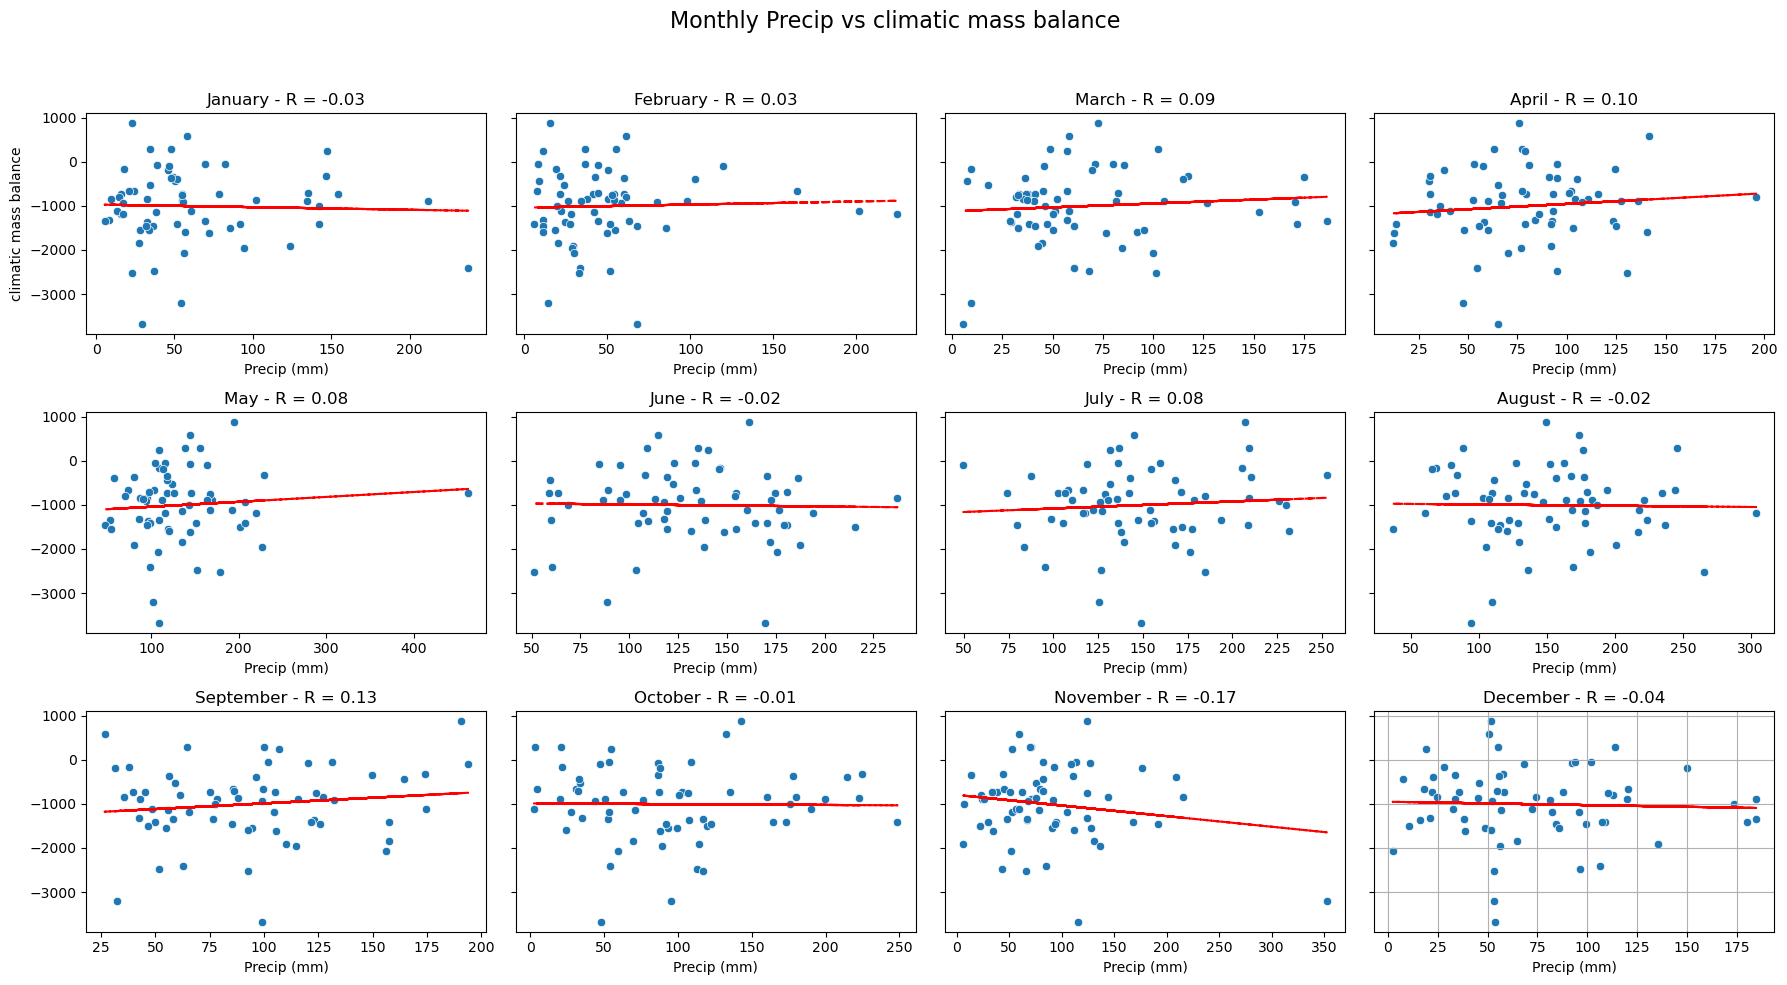

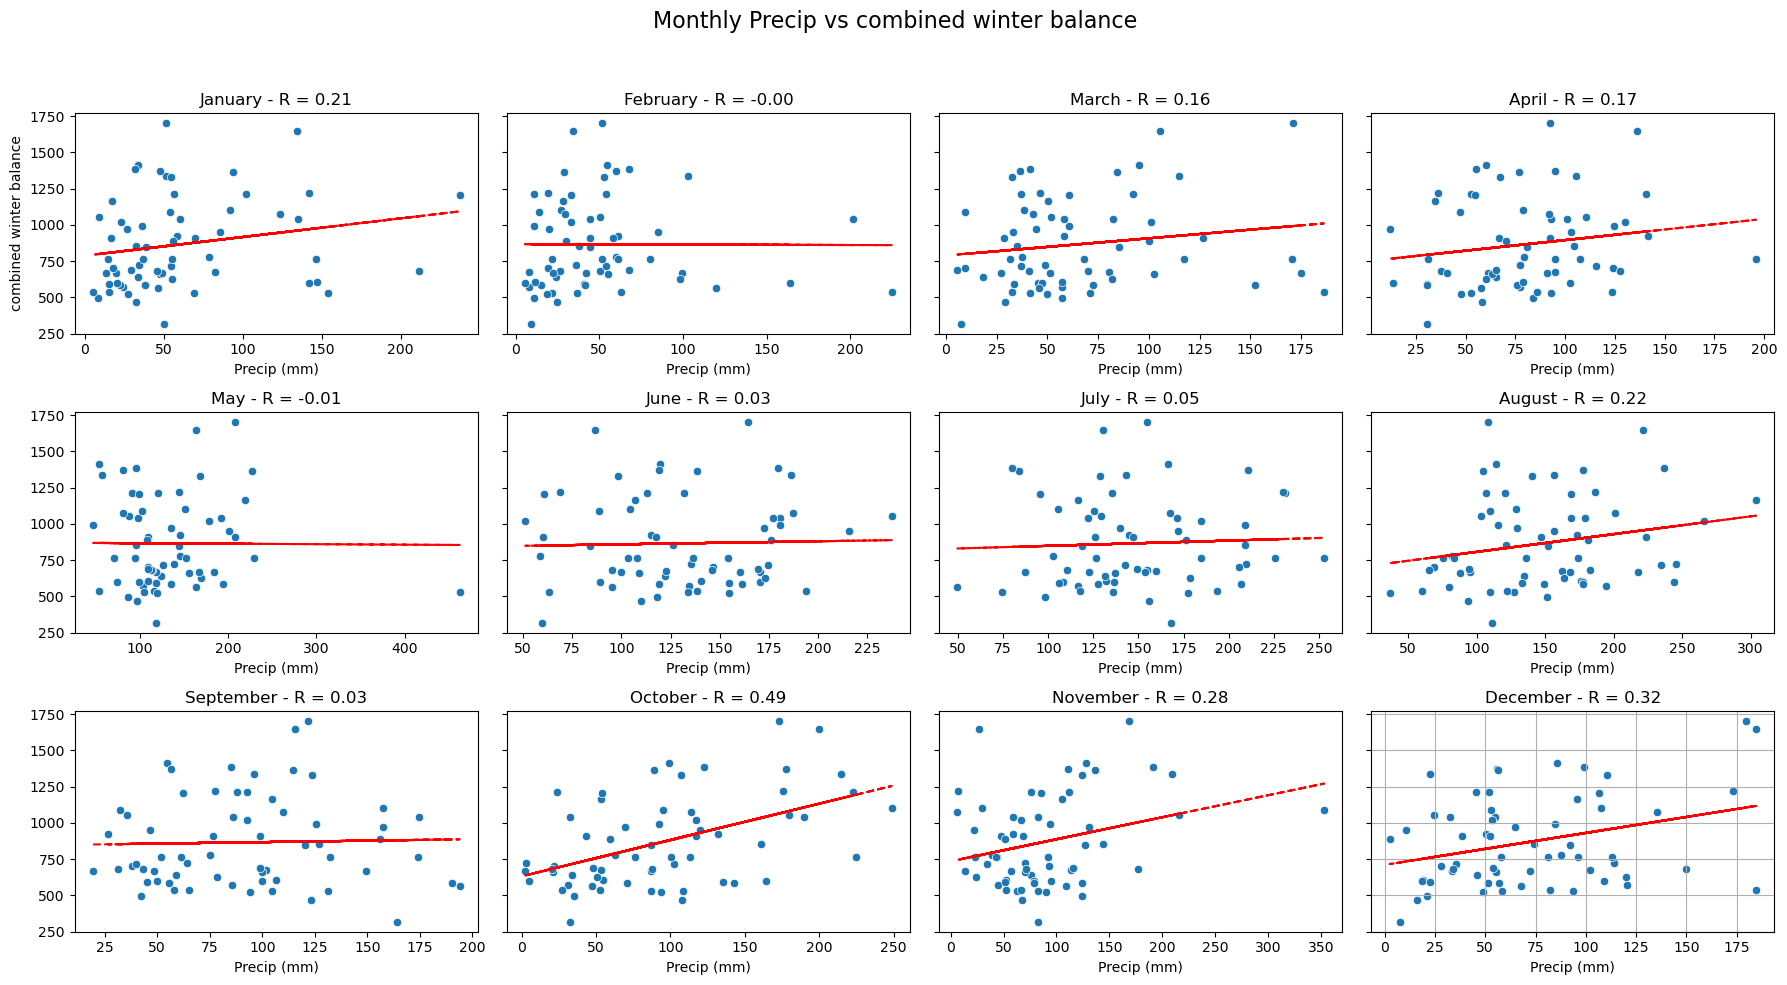

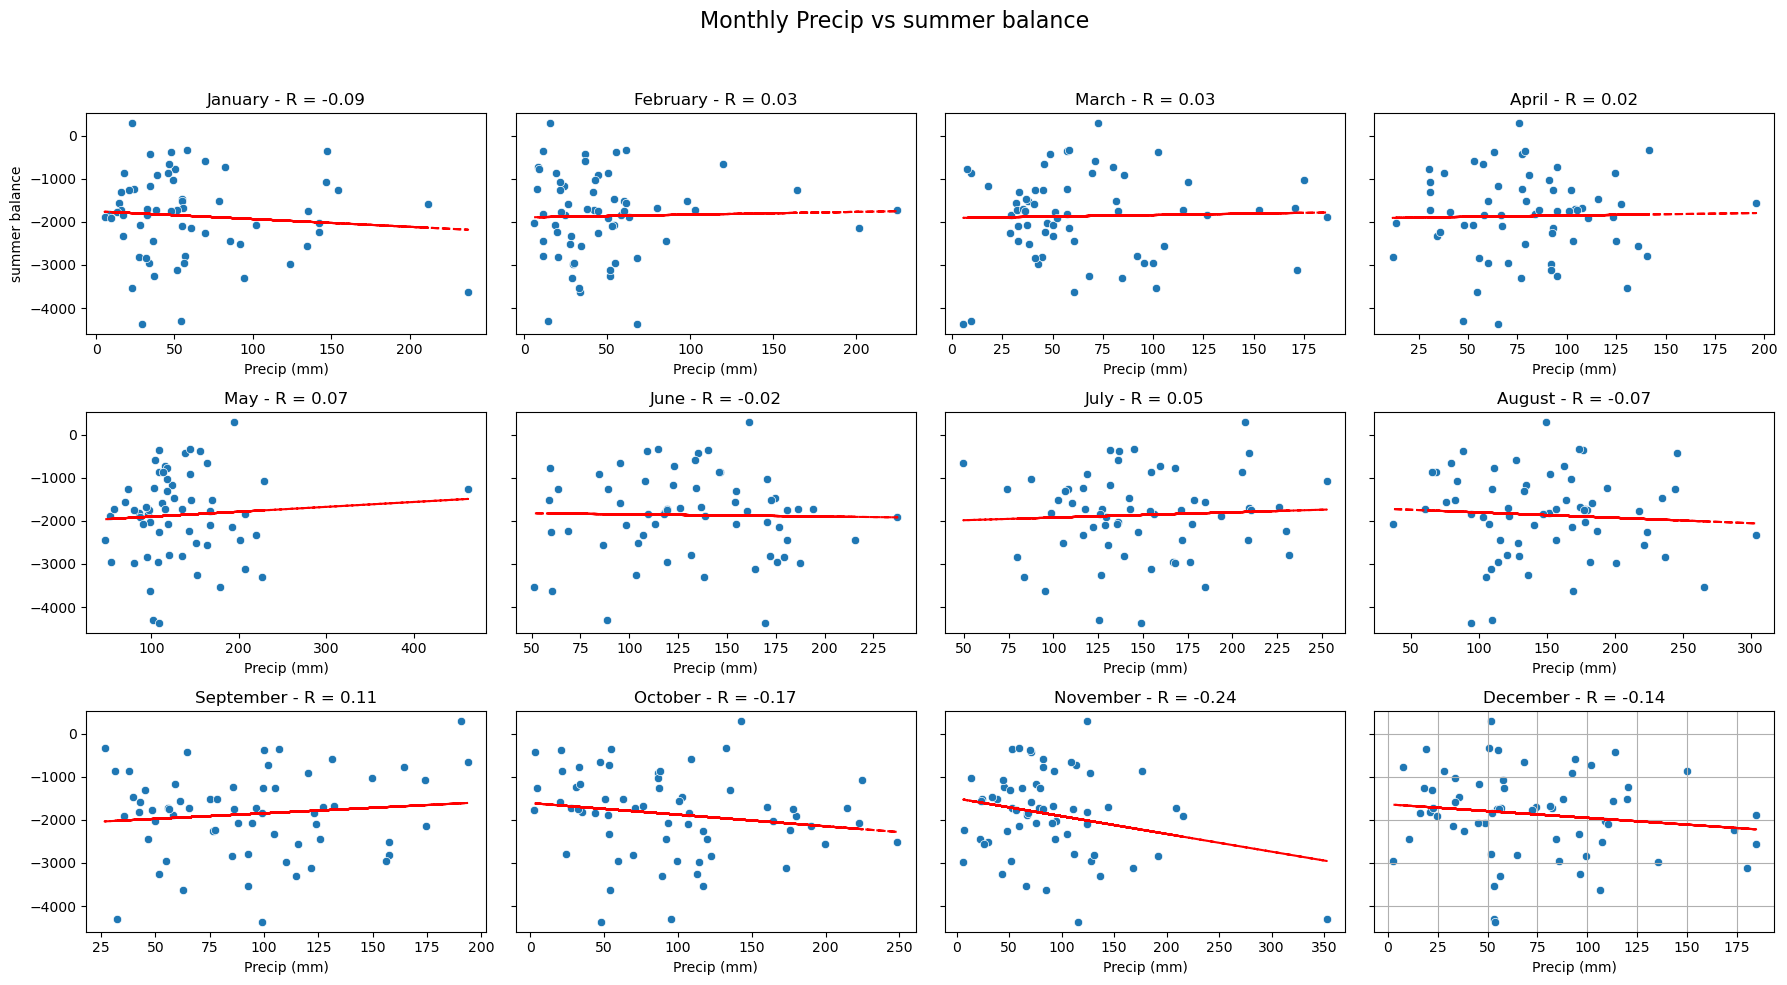

In [23]:
import seaborn as sns
from scipy.stats import linregress




df_merged["time"] = pd.to_datetime(df_merged["time"])  # ensure datetime format
df_merged["month"] = df_merged["time"].dt.month        # extract month

# List of month names
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

mb_cols = [
    'climatic mass balance',
    'combined winter balance',
    'summer balance'
]

print(df_merged)

for mb_col in mb_cols:
    fig, axs = plt.subplots(3, 4, figsize=(18, 10), sharey=True)
    axs = axs.flatten()

    for month in range(1, 13):
        ax = axs[month - 1]
        df_temp = df_merged[df_merged["month"] == month]
        df_temp = df_temp.dropna(subset=['RR [kg m-2]', mb_col])  # Drop NaNs from this subset

        # Check if there is any valid data for plotting
        if df_temp.empty or df_temp[mb_col].isna().all():
            ax.set_title(f"{month_names[month-1]}\n(no data)")
            continue

        # Get precipitation and mass balance
        x = df_temp['RR [kg m-2]']
        y = df_temp[mb_col]

        # Convert y to numeric, forcing errors to NaN
        y = pd.to_numeric(df_temp[mb_col], errors='coerce')

        # Drop NaNs and filter valid data
        valid = (~x.isna()) & (~y.isna())
        x_valid = x[valid]
        y_valid = y[valid]

        # Ensure there are at least two valid data points
        if len(x_valid) < 2:
            ax.set_title(f"{month_names[month-1]}\n(<2 pts)")
            continue

        # Scatter plot
        sns.scatterplot(x=x_valid, y=y_valid, ax=ax, color="tab:blue", label=None)

        # Perform linear regression and plot line of best fit
        try:
            slope, intercept, r_value, _, _ = linregress(x_valid, y_valid)
            ax.plot(x_valid, slope * x_valid + intercept, color="red", linestyle="--")
            ax.set_title(f"{month_names[month-1]} - R = {r_value:.2f}")
        except Exception as e:
            ax.set_title(f"{month_names[month-1]}\n(Error: {str(e)})")

        # Set labels only for the first month
        ax.set_xlabel("Precip (mm)")
        ax.set_ylabel(mb_col if month == 1 else "")  # Label only for the first month

    # Set a title for the entire figure
    plt.suptitle(f"Monthly Precip vs {mb_col}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.grid(True)
    plt.show()
